# **CSS 2 Final Project**
#### Juan Roa A15541981

******************
*******************

# **Description of data**

The dataset I am working with comes from the Institute for Health Metrics and Evaluation and deals with COVID-19 statistics (http://www.healthdata.org/covid/data-downloads). The data contains information on total death, daily death, infection rate, and testing worldwide with projections for three different scenarios: current projections, projections for easing of mandates, and projections for continued mask use. I am using data that was downloaded on May 7, 2021 and will be focusing on the scenario with eased mandates, specifically in the United States, because that seems to be the scenario we are progressing towards. Linear regression will be used to predict death totals with infection rates. A projection will be created to represent an estimated amount of deaths given increased infection rates. Binary classification will also be used to find if we can use infection rate to determine whether it comes from a hot or cold season; spring and summer or fall and spring.

*******************
*******************
# **Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn import metrics

*******************
*******************
# **Functions used in notebook**

The linear regression function is created specifically to analyze infection rates and death. It is not modular specifically because the axes in the graphs created by the function are tailored to infection and death rates. Regardless, the function splits inputed data into training and test data. A linear regression model is fit with the training data and from the fit, we are able to create predictions. The R^2 scores are also able to be calculated from the model and is rounded to 3 decimal points. A scatterplot of trainging and testing data are displayed in their own subplots with the regression line plotted on each graph with their R^2 values placed in a text box that can be found on the top left quadrant of the graph.

The binary classifcation function is created to show a few meaningful representations of the data: a boxplot of the data, the ROC curve, and the F1-score. The boxplot will be split two boxes (hot and cold seasons) with infection rates along the y-axis. There will be two subplots that display ROC Curve. The first ROC subplot will show the different depths tested to determine the best maximum depth the decision tree classifier will go. The second ROC subplot will contain the best curve of depths that were tested. The F1-score gives insight into both precision and recall and will be shown for each depth that is tested.

In [2]:
# Linear Regression Function
def linear_reg(x, y):
  # creates two subplots
  fig,axes = plt.subplots(1, 2, figsize=[10,7])

  # creates training and testing data
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2)

  # fits linear regression model for both training and testing data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # gets predicted y data for x inputs from the model
  predict_train = model.predict(X_train)
  predict_test = model.predict(X_test)

  # creates titles for training and testing plots
  train_R2 = 'R^2 score = ' + str(round(model.score(X_train, y_train), 3))
  test_R2 = 'R^2 score = ' + str(round(model.score(X_test, y_test), 3))

  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  # plots training graph onto left subplot
  axes[0].scatter(X_train, y_train, s=15, alpha=0.5)
  axes[0].plot(X_train, predict_train, color='orange')
  axes[0].set_title('Training Data', fontsize=20)
  axes[0].text(0, 2, train_R2, bbox=props)
  axes[0].set_ylabel('Deaths per 100k')
  axes[0].set_xlabel('Infections per 100k')

  # plots testing graph onto right subplot
  axes[1].scatter(X_test, y_test, s=15, alpha=0.5)
  axes[1].plot(X_test, predict_test, color='orange')
  axes[1].set_title('Testing Data', fontsize=20)
  axes[1].text(0, 2, test_R2, bbox=props)
  axes[1].set_ylabel('Deaths per 100k')
  axes[1].set_xlabel('Infections per 100k')

  plt.tight_layout(rect=(2,2,0,0))

  print('Slope = ', model.coef_)
  print('Intercept = ', model.intercept_)




# Binary Classification Function
def binary_class(X, y):
  # splits data into training and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  # creates different depths for Decision Tree Classifier
  depths = list(range(1,11))

  # list checking for graphs that are overfit
  of_check = []

  # list of f1 scores
  f1_scores = []

  # creates 4 subplots
  fig, axes = plt.subplots(1,4, figsize=[20,10])

  for depth in depths:
  
    # creates decision tree binary classification
    tree_model = tree.DecisionTreeClassifier(max_depth=depth)
    tree_model.fit(X_train, y_train)

    # determines accuracy
    accuracy = tree_model.score(X_test, y_test)
    accuracy_train = tree_model.score(X_train, y_train)

    # determines predicted values on testing data
    y_predicted = tree_model.predict_proba(X_test)[:,1]

    # determines true/false positive rates
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)

    # determines true/false positives and true/false negatives
    tn, fp, fn, tp = metrics.confusion_matrix(y_test,tree_model.predict(X_test)).ravel()

    # creates precision and recall variables
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    # calculates f1 score
    f1 = 2 * (precision * recall) / (precision + recall)

    # appends f1 scores to f1 list
    f1_scores.append(f1)
    
    # tests validation scores to see if model is overfit
    if abs(accuracy_train - accuracy) < 0.10:
      of_check.append(0)
    elif abs(accuracy_train - accuracy) >= 0.10:
      of_check.append(1)
   
    # Boxplot -- Subplot 1
    sns.boxplot(ax=axes[0], data=data, x='season', y='confirmed_infections_p100k_rate')
    axes[0].set_title('Season Boxplot')   

    # ROC Curves -- Subplot 2
    axes[1].plot(fpr,tpr,label=str(depth))
    axes[1].plot([0,1],[0,1])
    axes[1].set_title('ROC Curves', fontsize=18)
    axes[1].set_xlabel('False Positive Rate', fontsize=14)
    axes[1].set_ylabel('True Positive Rate', fontsize=14)
    axes[1].legend()

  # Fits training data to best max_depth
  tree_model = tree.DecisionTreeClassifier(max_depth=8)
  tree_model.fit(X_train, y_train)

  # determines accuracy
  accuracy = tree_model.score(X_test, y_test)
  accuracy_train = tree_model.score(X_train, y_train)

  # determines predicted values on testing data
  y_predicted = tree_model.predict_proba(X_test)[:,1]

  # determines true/false positive rates
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)

  # Best ROC Curve -- Subplot 3
  axes[2].plot(fpr,tpr,label=str(8), c='purple')
  axes[2].plot([0,1],[0,1])
  axes[2].set_title('Best ROC Curve', fontsize=18)
  axes[2].set_xlabel('False Positive Rate', fontsize=14)
  axes[2].set_ylabel('True Positive Rate', fontsize=14)
  axes[2].legend()

  # F1 Scores -- Subplot 4
  axes[3].plot(depths, f1_scores)
  axes[3].set_title('F1 Scores', fontsize=18)
  axes[3].set_xlabel('Depth', fontsize=14)
  axes[3].set_ylabel('F1 Score', fontsize=14)

  plt.tight_layout(rect=(4,0,4,0))
  
  print(of_check)
  print(f1_scores)
  print(max(f1_scores))

*******************
*******************
# **Getting data & Feature Engineering**

The dataset will be iniatilized as the variable 'data' and select features within the dataset will be kept while others are dropped in order to facilitate use of the data. I use the feature 'location_name' to find all data located within the United States of America so that the analysis will only focus on U.S. data. I also specify that the data I am analyzing is only observed data and not estimated/projected data. I also use the 'date' feature to dummy code data that differentiates between the hot season (spring and summer) and cold season (fall and winter) with 0 == cold season and 1 == hot season. A heatmap will be used to show that there is no missing data within the dataset.

In [3]:
# Code for acquiring data
data = pd.read_csv('worse_hospitalization_all_locs.csv')

In [4]:
# Focuses on important features / features I will analyze of the dataset
features = ['date','location_name', 'deaths_data_type', 'confirmed_infections_data_type',
            'deaths_mean_p100k_rate','totdea_mean_p100k_rate','deaths_reported_mean_p100k_rate', 
            'confirmed_infections_p100k_rate']

# Reconfigures dataset to important features
data = data[features]

# Sets dataset to the United States
data = data[data['location_name'] == 'United States of America']

# Makes sure all data being analyzed is observed data
data = data[data['deaths_data_type'] == 'observed']

# Creates variables to be used in functions / graphing
date = np.array(data['date']).reshape(454,1)
infection_p100k = np.array(data['confirmed_infections_p100k_rate']).reshape(454, 1)
deaths_p100k = np.array(data['deaths_mean_p100k_rate']).reshape(454,1)
totdeaths_p100k = np.array(data['totdea_mean_p100k_rate']).reshape(454,1)

# Empty list for dummy code
season = []

for i in date:
  # fall and winter months == cold months (0)
  if i[0][5:7] in ['09', '10', '11', '12', '01', '02']:
    season.append(0)
  # spring and summer months == hot months (1)
  elif i[0][5:7] in ['03', '04', '05', '06', '07', '08']:
    season.append(1)

# creates a variable for hot/cold season
season = np.array(season).reshape(454, 1)
data['season'] = season

# Adds season column to dataframe
season = np.array(data['season']).reshape(454,1)

# resets dataset index
data = data.reset_index()
data = data.drop(['index'], axis=1)

date                               False
location_name                      False
deaths_data_type                   False
confirmed_infections_data_type     False
deaths_mean_p100k_rate             False
totdea_mean_p100k_rate             False
deaths_reported_mean_p100k_rate    False
confirmed_infections_p100k_rate    False
season                             False
dtype: bool
AxesSubplot(0.125,0.125;0.62x0.755)


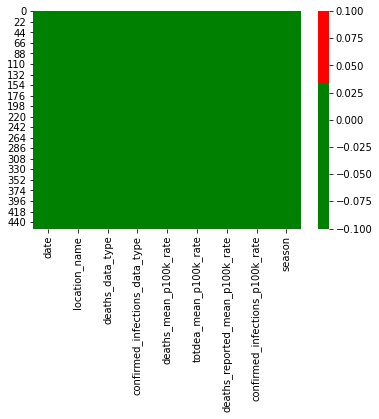

In [5]:
# Check and take care of null values
print(data.isna().any())
print(sns.heatmap(data.isnull(), cmap=['Green', 'Green', 'Red']))

In [6]:
# Display first 5 rows of data
data.head()

,date,location_name,deaths_data_type,confirmed_infections_data_type,deaths_mean_p100k_rate,totdea_mean_p100k_rate,deaths_reported_mean_p100k_rate,confirmed_infections_p100k_rate,season
0,2020-02-04,United States of America,observed,observed,0.0,-0.001669,0.0,0.0,0
1,2020-02-05,United States of America,observed,observed,0.0,-0.001669,0.0,0.0,0
2,2020-02-06,United States of America,observed,observed,0.0,-0.001669,0.0,0.0,0
3,2020-02-07,United States of America,observed,observed,0.0,-0.001669,0.0,0.0,0
4,2020-02-08,United States of America,observed,observed,0.0,-0.001669,0.0,0.0,0


In [7]:
# Display last 5 rows of data
data.tail()

,date,location_name,deaths_data_type,confirmed_infections_data_type,deaths_mean_p100k_rate,totdea_mean_p100k_rate,deaths_reported_mean_p100k_rate,confirmed_infections_p100k_rate,season
449,2021-04-28,United States of America,observed,observed,0.413703,275.098040,0.259904,16.571501,1
450,2021-04-29,United States of America,observed,observed,0.387545,275.485586,0.252194,17.521868,1
451,2021-04-30,United States of America,observed,observed,0.332879,275.818465,0.212557,17.528271,1
452,2021-05-01,United States of America,observed,observed,0.340577,276.159041,0.219468,14.832822,1
453,2021-05-02,United States of America,observed,observed,0.177855,276.336897,0.112754,10.859851,1


In [8]:
# Show data.info
data.info

<bound method DataFrame.info of            date  ... season
0    2020-02-04  ...      0
1    2020-02-05  ...      0
2    2020-02-06  ...      0
3    2020-02-07  ...      0
4    2020-02-08  ...      0
..          ...  ...    ...
449  2021-04-28  ...      1
450  2021-04-29  ...      1
451  2021-04-30  ...      1
452  2021-05-01  ...      1
453  2021-05-02  ...      1

[454 rows x 9 columns]>

In [9]:
# Show data.describe
data.describe

<bound method NDFrame.describe of            date  ... season
0    2020-02-04  ...      0
1    2020-02-05  ...      0
2    2020-02-06  ...      0
3    2020-02-07  ...      0
4    2020-02-08  ...      0
..          ...  ...    ...
449  2021-04-28  ...      1
450  2021-04-29  ...      1
451  2021-04-30  ...      1
452  2021-05-01  ...      1
453  2021-05-02  ...      1

[454 rows x 9 columns]>

***************
***************
# **Visualizing data**


Text(0.5, 1.0, 'Infection Rate vs. Death Rate \n in the United States (per 100k)')

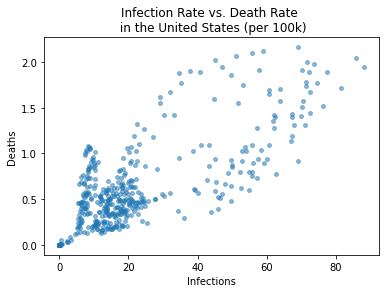

In [10]:
# visualization 1 (scatter of infection rate and death rate)
plt.scatter(infection_p100k, deaths_p100k, s=15, alpha=0.5)
plt.xlabel('Infections')
plt.ylabel('Deaths')
plt.title('Infection Rate vs. Death Rate \n in the United States (per 100k)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


Slope =  [[0.01825511]]
Intercept =  [0.22640069]


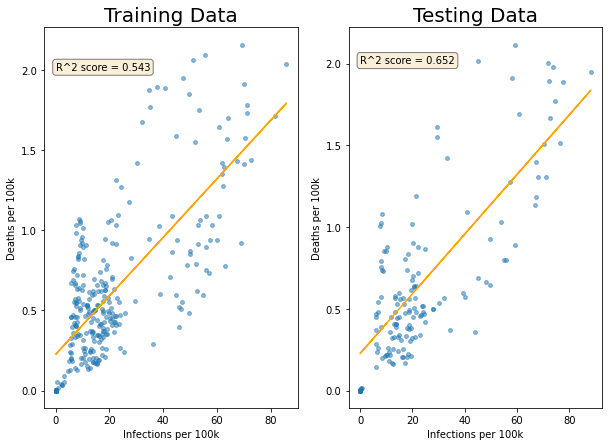

In [11]:
# visualization 2 (best fit line on training & testing scatters)
linear_reg(infection_p100k, deaths_p100k)

Text(0.5, 1.0, 'Infection vs Death (per 100k) \n Regression line: Death = 0.226 + Infection * 0.018')

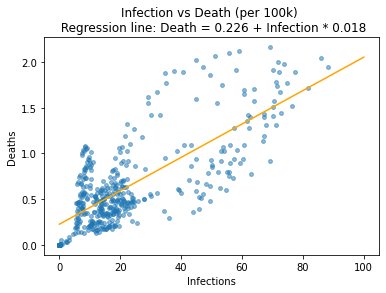

In [12]:
# visualization 3 (linear equation on scatterplot)
x_space = np.linspace(0,100)
y = 0.22640069 + x_space * 0.01825511

plt.scatter(infection_p100k, deaths_p100k, s=15, alpha=0.5)
plt.plot(x_space, y, c='orange')
plt.xlabel('Infections')
plt.ylabel('Deaths')
plt.title('Infection vs Death (per 100k) \n Regression line: Death = 0.226 + Infection * 0.018')

Text(0.5, 1.0, 'Infections vs. Deaths (per 100k) \n Hot vs. Cold Months ')

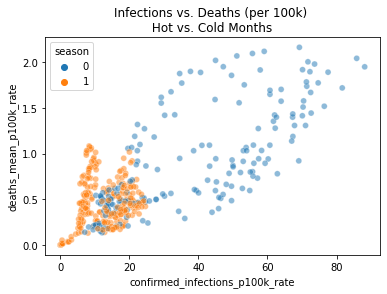

In [13]:
# visualization 4
sns.scatterplot(data=data, x='confirmed_infections_p100k_rate', y='deaths_mean_p100k_rate', hue='season', alpha=0.5)
plt.title('Infections vs. Deaths (per 100k) \n Hot vs. Cold Months ')

Text(0.5, 1.0, 'Infections Over Time (per 100k)')

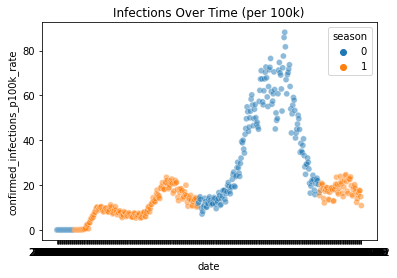

In [14]:
# visualization 5
sns.scatterplot(data=data, x='date', y='confirmed_infections_p100k_rate', hue='season', alpha=0.5)
plt.title('Infections Over Time (per 100k)')

Text(0.5, 1.0, 'Deaths Over Time (per 100k)')

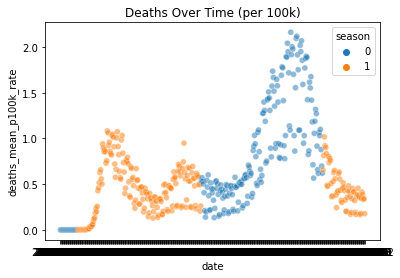

In [15]:
# visualization 6
sns.scatterplot(data=data, x='date', y='deaths_mean_p100k_rate', hue='season', alpha=0.5)
plt.title('Deaths Over Time (per 100k)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0.8, 0.8296296296296296, 0.8296296296296296, 0.8270676691729324, 0.8181818181818182, 0.8181818181818182, 0.8270676691729324, 0.8461538461538461, 0.8527131782945736, 0.8225806451612904]
0.8527131782945736


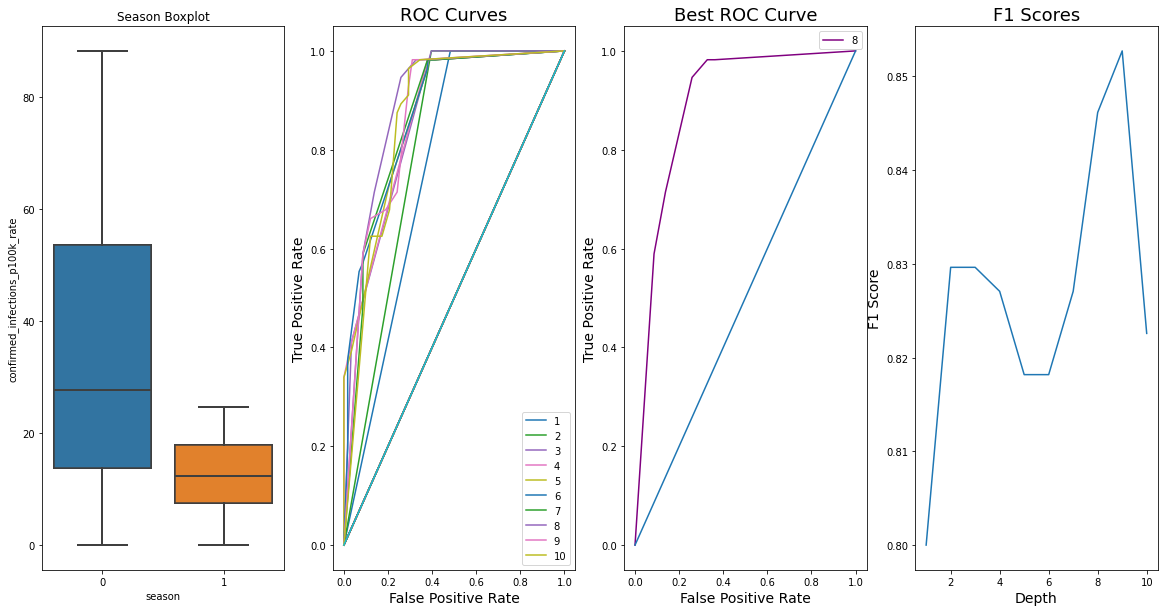

In [16]:
# visualization 7
binary_class(infection_p100k, season)

In [17]:
# Descriptive Statistics for Continuous Data
print('Infection Mean (per 100k): ', round(infection_p100k.mean(), 3))
print('Infection Median (per 100k): ', statistics.median(infection_p100k))
print('Infection Standard Deviation (per 100k): ', round(infection_p100k.std(), 3))
print()
print('Death Mean (per 100k): ', round(deaths_p100k.mean(), 3))
print('Death Median (per 100k): ', statistics.median(deaths_p100k))
print('Death Standard Deviation (per 100k): ', round(deaths_p100k.std(), 3))

print()

# Descriptive Statistics for Categorical Data
print('Cold Season Median Death Rate (per 100k): ', round(data[data['season'] == 0]['deaths_mean_p100k_rate'].median(), 3))
print('Cold Season Median Infection Rate (per 100k): ', round(data[data['season'] == 0]['confirmed_infections_p100k_rate'].median(), 3))
print()
print('Hot Season Median Death Rate (per 100k): ', round(data[data['season'] == 1]['deaths_mean_p100k_rate'].median(), 3))
print('Hot Season Median Infection Rate (per 100k): ', round(data[data['season'] == 1]['confirmed_infections_p100k_rate'].median(), 3))

Infection Mean (per 100k):  21.683
Infection Median (per 100k):  [15.72020133]
Infection Standard Deviation (per 100k):  19.698

Death Mean (per 100k):  0.609
Death Median (per 100k):  [0.49701901]
Death Standard Deviation (per 100k):  0.484

Cold Season Median Death Rate (per 100k):  0.602
Cold Season Median Infection Rate (per 100k):  27.735

Hot Season Median Death Rate (per 100k):  0.429
Hot Season Median Infection Rate (per 100k):  12.264


***************
***************
# **Analysis section**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


Slope =  [[0.01825511]]
Intercept =  [0.22640069]


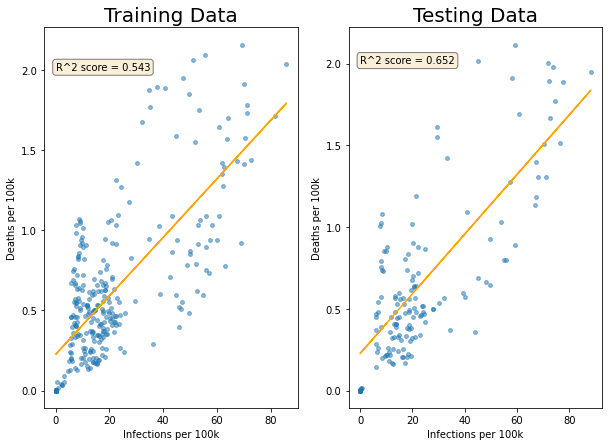

In [18]:
# Machine Learning 1
linear_reg(infection_p100k, deaths_p100k)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0.8, 0.8296296296296296, 0.8296296296296296, 0.8270676691729324, 0.8181818181818182, 0.8181818181818182, 0.8270676691729324, 0.8461538461538461, 0.8527131782945736, 0.8225806451612904]
0.8527131782945736


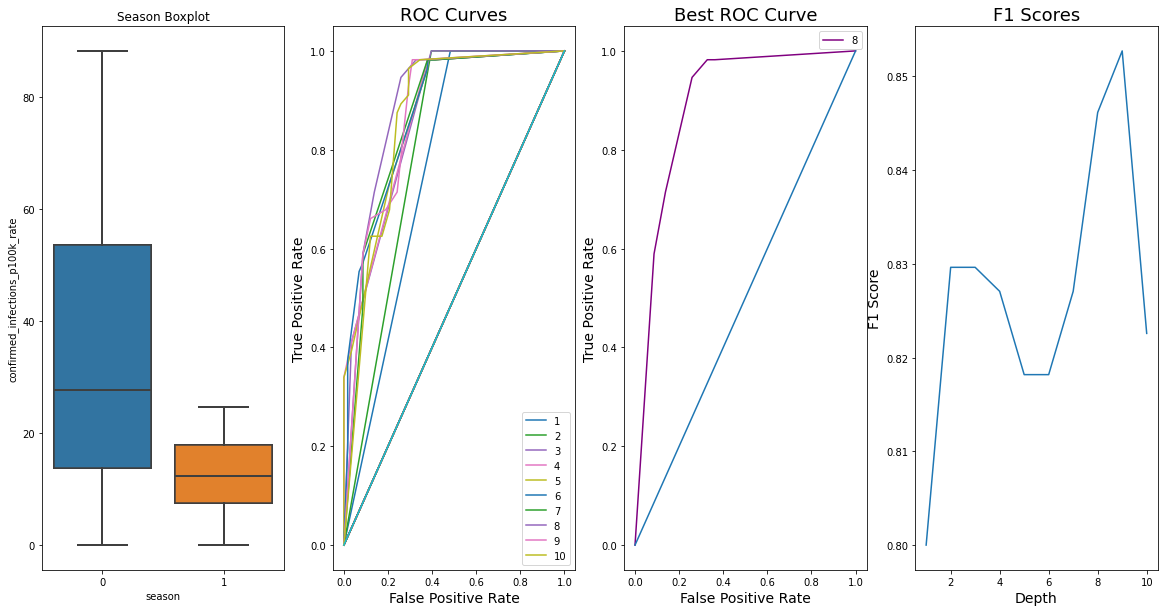

In [19]:
# Machine Learning 2
binary_class(infection_p100k, season)

***************
***************
# **Conclusions**

*Describe what you found and learned from your evaluation of your dataset*

**Linear Regression / Continuous Data**

Through linear regression, I have determined that there is a moderately positive relationship between infection rates and death rates. With an R^2 score of 0.543 for the training data and 0.652 for the testing data, it is interesting to see that the training score is lower than the testing score; however, it also shows that the model is not overfit to the data. By determining the linear regression model's coefficient and intercept, I was able to construct the linear equation that maps the linear regression line. Through this I was able to extend the line in order to estimate death rates given an increase in infection rates.

I found this to be roughly 200,000 deaths if the infection rate reached 10,000,000. This could be seen as an alarming statistics as it represents 1 in 50 people who become infected with COVID-19 dying from the virus, but this should be taken with a grain of salt as the analysis focuses on a single feature, infection rates, whereas the reality is that death rates have a multitude of factors that are influential. It is also interesting to see that the data shows a average of 2,168,000 infections and an average of 60,900 deaths, which is roughly follows the estimation made by the linear regression analysis.


**Binary Classification / Categorical Data**
By separating the data into cold and hot seasons, it creates a new avenue to look at COVID-19 data, particularly through the passage of time. By looking at the scatterplot created of infection rates over time, it shows that the first summer of the pandemic had smaller spikes of infection but they pale in comparison to the infection spike of Winter 2020. Holidays such as Thanksgiving and Christmas may most likely constribute to these spikes as many families gathered together after distancing from one another for the end of the year holidays that are heavily family-based. Similarly, by looking at the scatterpolt of deaths over time, it can be seen that the cold months contain larger death spikes than the warmer months, but are not of the same magnitude as infection rates. The average death rate per 100,000 during cold season was 60,200 whereas the hot season saw an average of 42,900 deaths. The average infection rate for the cold season saw an average of 2,700,000 deaths, whereas the hot season only saw an average of 1,200,000 infections. 

Through the use of decision tree classification and testing different depths for the classification, I found that the decision tree classification with a max depth of 8 yielded the best ROC curve as well as F1 score compared to its counterparts. With an F1 score of 0.852, we can have moderate confidence that we can predict what season (hot or cold) a datapoint would come from given its infection rate.